<a href="https://colab.research.google.com/github/vitalfedorov/ML_Notes/blob/master/Binary_Cross_Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

This notebook is based on the Shipra Saxena article 'Binary Cross Entropy/Log Loss for Binary Classification'. [Source](https://www.analyticsvidhya.com/blog/2021/03/binary-cross-entropy-log-loss-for-binary-classification/)

### Binary Cross Entropy Definition

Binary cross entropy compares each of predicted probabilities to the actual value (target), which can be either 0 or 1.

In [19]:
n = 100
np.random.seed(115)

ids = [f'ID{i}' for i in range(n)]
targets = np.random.randint(2, size=n)
probs = np.random.uniform(low=0.0, high=1.0, size=100)

In [118]:
d = {'ID': ids, 'Target': targets, 'Predicted probabilities': probs}
ds = pd.DataFrame(data=d)

In [119]:
ds

,ID,Target,Predicted probabilities
0,ID0,0,0.190259
1,ID1,0,0.364309
2,ID2,1,0.636945
3,ID3,0,0.860214
4,ID4,0,0.834129
...,...,...,...
95,ID95,1,0.548423
96,ID96,1,0.554190
97,ID97,0,0.955729
98,ID98,0,0.641395


Predicted probability is the output given by the model that tells, the probability object belongs to class 1. Hence, the probability that the model output belongs to class 0 is the 1 minus predicted probability. In the table below 'corr_prob' is the predicted probability that is corrected for classes.  

Therefore the cross entropy is the sum of corrected logs:

\begin{equation*}
CrossEntropy=-\frac{1}{N}\sum_{j=1}^N(log(p_i))
\end{equation*}

Instead of calculating corrected probabilities, we can calculate the Log loss using the formula given below:

\begin{equation*}
CrossEntropy=\frac{1}{N}\sum_{j=1}^N -(y_i*log(p_i)+(1-y_i)*log(1-p_i))
\end{equation*}

In [121]:
ds['corr_prob'] = ds.apply(lambda row: row['Predicted probabilities'] if row['Target'] == 1 else 1 - row['Predicted probabilities'], axis=1)
ds['log_corr_prob'] = np.log(ds['corr_prob'])

ds['log_prob_1'] = ds.apply(lambda row: np.log(row['Predicted probabilities']) if row['Target'] == 1 else 0, axis=1)
ds['log_prob_0'] = ds.apply(lambda row: np.log(1 - row['Predicted probabilities']) if row['Target'] == 0 else 0, axis=1)


In [122]:
ds

,ID,Target,Predicted probabilities,corr_prob,log_corr_prob,log_prob_1,log_prob_0
0,ID0,0,0.190259,0.809741,-0.211041,0.000000,-0.211041
1,ID1,0,0.364309,0.635691,-0.453043,0.000000,-0.453043
2,ID2,1,0.636945,0.636945,-0.451072,-0.451072,0.000000
3,ID3,0,0.860214,0.139786,-1.967642,0.000000,-1.967642
4,ID4,0,0.834129,0.165871,-1.796543,0.000000,-1.796543
...,...,...,...,...,...,...,...
95,ID95,1,0.548423,0.548423,-0.600708,-0.600708,0.000000
96,ID96,1,0.554190,0.554190,-0.590247,-0.590247,0.000000
97,ID97,0,0.955729,0.044271,-3.117420,0.000000,-3.117420
98,ID98,0,0.641395,0.358605,-1.025533,0.000000,-1.025533


In [128]:
a = -np.sum(ds['log_corr_prob']) / len(ds)
print(f'CrossEntropy (formula #1): {a:.2f}')

b = np.sum(-ds['Target']*np.log(ds['Predicted probabilities']) + (1-ds['Target'])*np.log(1-ds['Predicted probabilities'])) / len(ds)
print(f'CrossEntropy (formula #2): {b:.2f}')

CrossEntropy (formula #1): 1.12
CrossEntropy (formula #2): 0.17


Finally, the graph below shows the range of possible loss values given target values 1 or 0.

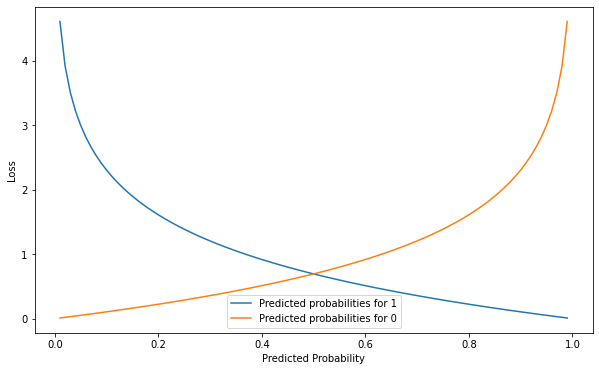

In [112]:
z = np.arange(0.01, 1, 0.01)

plt.figure(figsize=(10, 6))
plt.plot(z, -np.log(z), label='Predicted probabilities for 1')
plt.plot(z, -np.log(1-z), label='Predicted probabilities for 0')
plt.xlabel('Predicted Probability')
plt.ylabel('Loss')
plt.legend()
plt.show()